In [2]:
# Queastion 1
import import_ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math
import sklearn.cluster as cluster
from sklearn.neighbors import NearestNeighbors as kNN
from sklearn.neighbors import DistanceMetric as DM

dataFram = pd.read_csv("F:/Assigmnents/Machine Learning/Assigmnent_02/Groceries.csv")

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

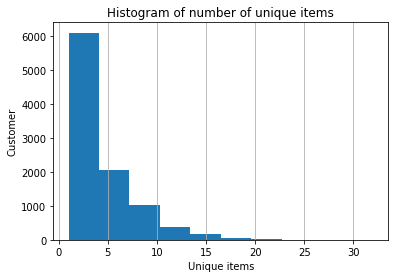

In [4]:
# Question 1 a)
basket = dataFram.groupby(['Customer'])['Item'].nunique()
#print(basket)
# Histogram
plt.hist(basket)
plt.title("Histogram of number of unique items")
plt.xlabel("Unique items")
plt.ylabel("Customer")
plt.grid(axis="x")
plt.show()
MiddleQuartile=np.percentile(basket,50)

In [5]:
lowQuart=np.percentile(basket,25)
print("25th percentile: ",lowQuart)
midQuart=np.percentile(basket,50)
print("50th percentile: ",midQuart)
highquart=np.percentile(basket,75)
print("70th percentile: ",highquart)

25th percentile:  2.0
50th percentile:  3.0
70th percentile:  6.0


In [6]:
# Question 1 b)
ListItem = dataFram.groupby(['Customer'])['Item'].apply(list).values.tolist()

te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pd.DataFrame(te_ary, columns=te.columns_)
#print(ItemIndicator)

In [11]:
totalTransactions=np.count_nonzero(basket)
minSupport=75/totalTransactions
freqofitem = apriori(ItemIndicator, min_support = minSupport, use_colnames = True) # Frequent itemsets
print("Ttemset \n",freqofitem.head())

numOfItemset=freqofitem.support.count()

print("Number of itemsets: ",numOfItemset,"\n")

k = len(freqofitem['itemsets'] [len(freqofitem)-1])
print("Largest value of K = ",k)

Ttemset 
     support                 itemsets
0  0.008033  (Instant food products)
1  0.033452               (UHT-milk)
2  0.017692          (baking powder)
3  0.052466                   (beef)
4  0.033249                (berries)
Number of itemsets:  524 

Largest value of K =  4


In [12]:
# Question 1 c)

# How many association rules whose Confidence metrics are greater than or equal to 1%  
assocRules = association_rules(freqofitem, metric = "confidence", min_threshold = 0.01)
print("Association rules \n",assocRules)
assocRules.describe()

totalAssocRules=assocRules.antecedents.count()
print("No. of association rules: ",totalAssocRules)

Association rules 
                                           antecedents  \
0                                  (other vegetables)   
1                                          (UHT-milk)   
2                                              (soda)   
3                                          (UHT-milk)   
4                                     (baking powder)   
5                                        (whole milk)   
6                                              (beef)   
7                                      (citrus fruit)   
8                                              (beef)   
9                                  (other vegetables)   
10                                             (beef)   
11                                             (pork)   
12                                       (rolls/buns)   
13                                             (beef)   
14                                  (root vegetables)   
15                                             (beef)   
16         

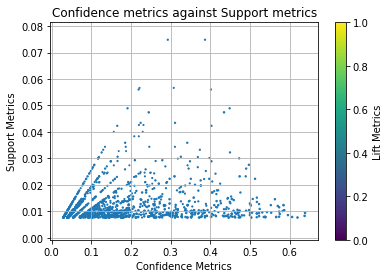

In [13]:
# Question 1 d)

plt.scatter(assocRules['confidence'], assocRules['support'], s = assocRules['lift'])
plt.grid(True)
plt.title("Confidence metrics against Support metrics")
plt.xlabel("Confidence Metrics")
plt.ylabel("Support Metrics")
cbar=plt.colorbar()
cbar.set_label("Lift Metrics")
plt.show()

In [14]:
# Question 1 e)
assocRulesfor60 = association_rules(freqofitem, metric="confidence", min_threshold=0.6)
assocRulesfor60

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423
1,"(butter, yogurt)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648
2,"(root vegetables, yogurt, other vegetables)",(whole milk),0.012913,0.255516,0.007829,0.606299,2.372842,0.004530,1.890989
3,"(tropical fruit, yogurt, other vegetables)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317


In [15]:
# Question 2
import numpy as np
carsDataFram = pd.read_csv("F:/Assigmnents/Machine Learning/Assigmnent_02/cars.csv")

In [16]:
# Question 2 a)
carsDataFram['Type'].value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [17]:
# Question 2 b)
carsDataFram['DriveTrain'].value_counts()

FWD    226
RWD    110
AWD     92
Name: DriveTrain, dtype: int64

In [18]:
# Question 2 c)
asiaFrq = carsDataFram['Origin'].value_counts()['Asia']
print("Frequency of Asia Origin: ",asiaFrq)
europeFrq = carsDataFram['Origin'].value_counts()['Europe']
print("Frequency of Europe Origin: ",europeFrq)
distance_in_AsiaEurope = ((1/asiaFrq)+(1/europeFrq))
print("Distance metric between Asia and Europe is: ", distance_in_AsiaEurope)

Frequency of Asia Origin:  158
Frequency of Europe Origin:  123
Distance metric between Asia and Europe is:  0.014459195224863643


In [19]:
# Question 2 d)
CylindersFive = carsDataFram['Cylinders'].value_counts()[5]
cylindersMissing = carsDataFram['Cylinders'].isnull().sum()
distance_in_CylindersFivecylindersMissing = ((1/CylindersFive)+(1/cylindersMissing))
print("Distnace metric between CylindersFive and cylindersMissing is: ", distance_in_CylindersFivecylindersMissing)

Distnace metric between CylindersFive and cylindersMissing is:  0.6428571428571428


In [20]:
# ckecking null in all categorical features: Type, Origin, DriveTrain, and Cylinders.
print(carsDataFram['Type'].isnull().sum())
print(carsDataFram['Origin'].isnull().sum())
print(carsDataFram['DriveTrain'].isnull().sum())
print((carsDataFram['Cylinders'].isnull().sum()))

0
0
0
2


In [21]:
# replace null value with any value(eg: 1) other then existing categories
carsDataFram['Cylinders'] = carsDataFram['Cylinders'].replace(np.nan, 0)
print((carsDataFram['Cylinders'].isnull().sum()))
print(carsDataFram[carsDataFram['Cylinders'] == 0])

0
      Make               Model    Type Origin DriveTrain   MSRP  Invoice  \
247  Mazda  RX-8 4dr automatic  Sports   Asia        RWD  25700    23794   
248  Mazda     RX-8 4dr manual  Sports   Asia        RWD  27200    25179   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
247         1.3        0.0         197        18           25    3053   
248         1.3        0.0         238        18           24    3029   

     Wheelbase  Length  
247        106     174  
248        106     174  


In [28]:
# Question 2 e)
from kmodes.kmodes import KModes

#Type, Origin, DriveTrain, and Cylinders
trainCarsDF = carsDataFram[['Type','Origin','DriveTrain','Cylinders']]

Kmod = KModes(n_clusters=3, init='Huang', n_init=4, verbose=1)
clusters = Kmod.fit_predict(trainCarsDF)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 78, cost: 592.0
Run 1, iteration: 2/100, moves: 0, cost: 592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 649.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 37, cost: 614.0
Run 3, iteration: 2/100, moves: 0, cost: 614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 80, cost: 621.0
Run 4, iteration: 2/100, moves: 44, cost: 604.0
Run 4, iteration: 3/100, moves: 0, cost: 604.0
Best run was number 1


In [29]:
print(clusters)
print("Observations in 1st cluster: ", (clusters == 0).sum())
print("Observations in 2nd cluster: ", (clusters == 1).sum())
print("Observations in 3rd cluster: ", (clusters == 2).sum())

# Print the cluster centroids
print(Kmod.cluster_centroids_)

[2 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0
 0 0 0 0 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0
 2 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 1 1 2 0 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0
 1 1 1 1 1 1 1 2 0 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 0 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2
 2 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 2 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 2 0 1 0 1 1 1 0 0 1 0 1]
Observations in 1st cluster:  254
Observations in 2nd cluster:  112
Observations in 3rd cluster:  62
[['Sedan' 'USA' 'FWD' '4.0']
 

In [30]:
len(clusters)

428

In [31]:
# Question 2 f)
carsDataFram["clusters"] = clusters
df = pd.DataFrame(carsDataFram.groupby(["clusters","Origin"]).size())
df.rename(columns={df.columns[0]: "Frequency Distribution Table"}, inplace= True)
df

Frequency Distribution Table
clusters Origin                              
0        Asia                              98
         Europe                            31
         USA                              125
1        Asia                              19
         Europe                            82
         USA                               11
2        Asia                              41
         Europe                            10
         USA                               11

In [32]:
# Question 3 KMeans 

circleDataFram = pd.read_csv("F:/Assigmnents/Machine Learning/Assigmnent_02/FourCircle.csv")

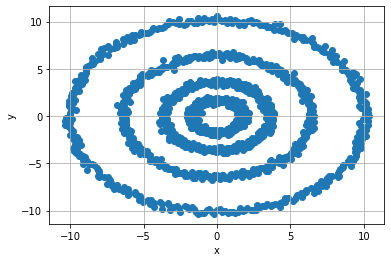

To see this plot, we can say that there are 4 clusters because we have 4 concentric circles and we divide them in 4 quarters


In [33]:
# Question 3 a)


plt.scatter(circleDataFram['x'], circleDataFram['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

print("To see this plot, we can say that there are 4 clusters because we have 4 concentric circles and we divide them in 4 quarters")

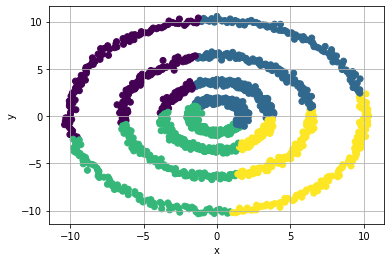

In [34]:
# Question 3 b)

trainData = circleDataFram[['x','y']]
kmeans = cluster.KMeans(n_clusters=4, random_state=60616).fit(trainData)

circleDataFram['KMeanCluster'] = kmeans.labels_

plt.scatter(circleDataFram['x'], circleDataFram['y'], c = circleDataFram['KMeanCluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

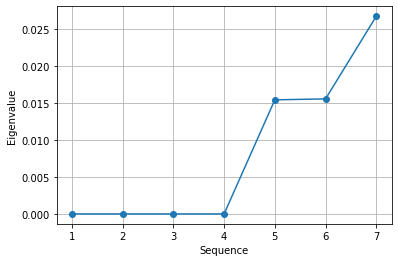

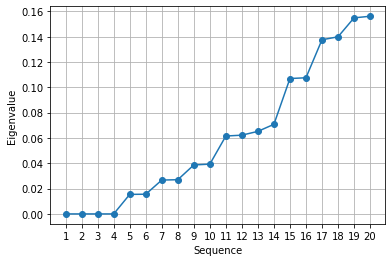

In [35]:
# Question 3 c)
import numpy
from sklearn.neighbors import NearestNeighbors as neighbors
from sklearn.neighbors import DistanceMetric
from numpy import linalg
import math
trainData = np.array(trainData)
kNNSpec = kNN(n_neighbors = 15, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainData)
d3, i3 = nbrs.kneighbors(trainData)
# Retrieve the distances among the observations
distObject = DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainData)

nObs = trainData.shape[0]
# Create the Adjacency matrix
Adjacency = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest 7 eigenvalues to determine the number of clusters
sequence = numpy.arange(1,8,1) 
plt.plot(sequence, evals[0:7,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

# Series plot of the smallest twenty eigenvalues to determine the number of neighbors
sequence = numpy.arange(1,21,1) 
plt.plot(sequence, evals[0:20,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.grid("both")
plt.xticks(sequence)
plt.show()

Adjacency Matrix: 
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.96602229 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.96602229 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Degree Matrix: 
 [[4.80117773 0.         0.         ... 0.         0.         0.        ]
 [0.         4.29598338 0.         ... 0.         0.         0.        ]
 [0.         0.         5.55116784 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 5.29371731 0.         0.        ]
 [0.         0.         0.         ... 0.         4.88916173 0.        ]
 [0.         0.         0.         ... 0.         0.         4.94116662]]
Laplacian Matrix: 
 [[ 3.80117773  0.          0.         ...  0.          

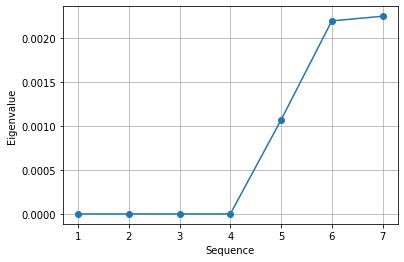

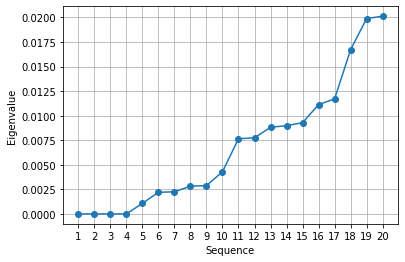

In [65]:
# Question 3 d)
kNNSpec6 = kNN(n_neighbors = 6, algorithm = 'brute', metric = 'euclidean')
nbrs6 = kNNSpec6.fit(trainData)
d6, i6 = nbrs6.kneighbors(trainData)
# Retrieve the distances among the observations
distObject6 = DistanceMetric.get_metric('euclidean')
distances6 = distObject6.pairwise(trainData)

# Create the Adjacency matrix
Adjacency6 = numpy.zeros((nObs, nObs))
for i in range(nObs):
    for j in i6[i]:
        Adjacency6[i,j] = math.exp(- (distances6[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency6 = 0.5 * (Adjacency6 + Adjacency6.transpose())

print("Adjacency Matrix: \n",Adjacency6)

# Create the Degree matrix
Degree6 = numpy.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency6[i,j]
    Degree6[i,i] = sum

print("Degree Matrix: \n",Degree6)
# Create the Laplacian matrix        
Lmatrix6 = Degree6 - Adjacency6

print("Laplacian Matrix: \n",Lmatrix6)

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals6, evecs6 = linalg.eigh(Lmatrix6)

# Series plot of the smallest 7 eigenvalues to determine the number of clusters
sequence = numpy.arange(1,8,1) 
plt.plot(sequence, evals6[0:7,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.xticks(sequence)
plt.grid("both")
plt.show()

# Series plot of the smallest twenty eigenvalues to determine the number of neighbors
sequence = numpy.arange(1,21,1) 
plt.plot(sequence, evals6[0:20,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.grid("both")
plt.xticks(sequence)
plt.show()

In [70]:
foureval = []
for i  in range(len(evals6)):
    if (evals6[i] < math.exp(-7)):
        foureval.append(evals6[i])
print("Eigenvalues are practically zero: \n", foureval)

Eigenvalues are practically zero: 
 [-2.1853679383486055e-15, -2.1537079867095397e-15, -3.8349873779272163e-16, 4.802750469104981e-16]


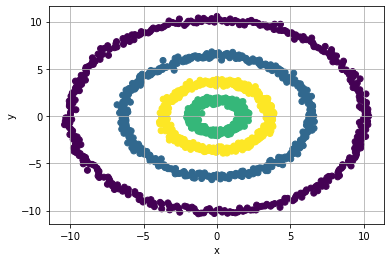

In [71]:
# Question 3 e)
Z = []
Z = evecs14[:,[0,1,2,3]]

kmeans_spectral = cluster.KMeans(n_clusters = 4, random_state = 60616).fit(Z)
circleDataFram['SpectralCluster'] = kmeans_spectral.labels_

plt.scatter(circleDataFram['x'], circleDataFram['y'], c = circleDataFram['SpectralCluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
